# k-means

In [1]:
import pandas as pd
import numpy as np

In [7]:
Data = pd.read_csv('House_Price_Regression.csv')

Data = Data.loc[:, ['latitude', 'longitude', 'price', 'size_in_m_2']]

Data.head()

,latitude,longitude,price,size_in_m_2
0,25.113208,55.138932,2700000,100.242337
1,25.106809,55.151201,2850000,146.972546
2,25.063302,55.137728,1150000,181.253753
3,25.227295,55.341761,2850000,187.664060
4,25.114275,55.139764,1729200,47.101821


In [34]:
def k_means(k , Data, random_seed, Distance, q=1):  # Por ahora el k máximo aceptado es k=4

#########################################################################################

# Librerias necesarias

    from sklearn.utils import resample

    import numpy as np

    import pandas as pd

    import math

#########################################################################################

    # Definición de las distancias:


    ## Distancia Euclidea:

    def Dist_Euclidea(x_i, x_r):

        Dist_Euclidea = ( ( x_i - x_r )**2 ).sum()

        Dist_Euclidea = np.sqrt(Dist_Euclidea)

        return Dist_Euclidea


    ## Distancia Minkowski:

    def Dist_Minkowski(x_i, x_r, q):

        Dist_Minkowski = ( ( ( abs( x_i - x_r) )**q ).sum() )**(1/q)

        return Dist_Minkowski


    ## Distancia Canberra:

    def Dist_Canberra(x_i, x_r):

        numerator =  abs( x_i - x_r )

        denominator =  ( abs(x_i) + abs(x_r) )
       
        numerator=np.array([numerator], dtype=float)

        denominator=np.array([denominator], dtype=float)

        # The following code is to eliminate zero division problems

        Dist_Canberra = ( np.divide( numerator , denominator , out=np.zeros_like(numerator), where=denominator!=0) ).sum() 

        return Dist_Canberra

   

#########################################################################################


    #Configuracion inicial aleatoria de los clusters:

    n=len(Data)


    elementos_clusterizados = []

    m = resample(range(0, n), n_samples=math.floor(n/k) , replace=False, random_state=random_seed)

    Cluster_0 = Data.loc[m,:]

    elementos_clusterizados.append(m)


##############################


    if k >= 2:


        # Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
        #  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.

        if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

            Cluster_1 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

            elementos_clusterizados.append(m)

        else:

            m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=random_seed)

            Cluster_1 = Data.loc[m,:]

            elementos_clusterizados.append(m)

    elif k < 2 :

        pass

###############################

    if k >= 3:

# Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
#  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.


        if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

            Cluster_2 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

            elementos_clusterizados.append(m)

        else:

            m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=random_seed)

            Cluster_2 = Data.loc[m,:]

            elementos_clusterizados.append(m)

    elif k < 3 :

        pass

###############################

    if k >= 4:

# Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
#  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.


        if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

            Cluster_3 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

            elementos_clusterizados.append(m)

        else:

            m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=random_seed)

            Cluster_3 = Data.loc[m ,:]

            elementos_clusterizados.append(m)

    elif k < 4 :

          pass


#########################################################################################


    lista_clusters = [None] * 4

    lista_clusters[0] = Cluster_0
    lista_clusters[1] = Cluster_1
    lista_clusters[2] = Cluster_2
    lista_clusters[3] = Cluster_3

   # Calculo de centroides iniciales

    centroide_0 = lista_clusters[0].mean()
    centroide_1 = lista_clusters[1].mean()
    centroide_2 = lista_clusters[2].mean()
    centroide_3 = lista_clusters[3].mean()

   # Calculo de distancias para la observacion x_1

    x_1 = Data.iloc[0,:]

    if Distance == 'Euclidea' :

        distancia_0 = Dist_Euclidea(x_1 , centroide_0) 
        distancia_1 = Dist_Euclidea(x_1 , centroide_1) 
        distancia_2 = Dist_Euclidea(x_1 , centroide_2) 
        distancia_3 = Dist_Euclidea(x_1 , centroide_3)

    if Distance == 'Minkowski' :

        distancia_0 = Dist_Minkowski(x_1 , centroide_0, q)
        distancia_1 = Dist_Minkowski(x_1 , centroide_1, q) 
        distancia_2 = Dist_Minkowski(x_1 , centroide_2, q) 
        distancia_3 = Dist_Minkowski(x_1 , centroide_3, q)        

    if Distance == 'Canberra' :

        distancia_0 = Dist_Canberra(x_1 , centroide_0)
        distancia_1 = Dist_Canberra(x_1 , centroide_1) 
        distancia_2 = Dist_Canberra(x_1 , centroide_2) 
        distancia_3 = Dist_Canberra(x_1 , centroide_3)      

    # Calculo de cluster optimo para x_1

    df_distancias = pd.DataFrame({'Distancias' : [distancia_0, distancia_1 , distancia_2 , distancia_3], 'Cluster': [0,1,2,3]})

    df_distancias_sort = df_distancias.sort_values(by='Distancias', ascending=True)

    j_star = df_distancias_sort.iloc[0]['Cluster']

    j_star = int(j_star)


#########################################################################################

    i = 1

    while i <= n-2 :

        for j in range(0, k) :


           # Si x_i no esta en el cluster j --> pasamos a analizar otro cluster j

            if sum(lista_clusters[j].index == i-1) ==  0 :

                    pass


        # Si x_i esta en el cluster j y es el cluster optimo de x_i --> pasamos a x_i+1

            if ( sum(lista_clusters[j].index == i-1) != 0 )  & ( j_star == j ) :

            # Actualizamos i a i+1

                i = i + 1


            # calculamos las distancias entre x_i+1 y los centroides

                x_i = Data.iloc[ i ,:] # x_{i+1}

                if Distance == 'Euclidea' :

                    distancia_0 = Dist_Euclidea(x_i , centroide_0) 
                    distancia_1 = Dist_Euclidea(x_i , centroide_1) 
                    distancia_2 = Dist_Euclidea(x_i , centroide_2) 
                    distancia_3 = Dist_Euclidea(x_i , centroide_3)

                if Distance == 'Minkowski' :

                    distancia_0 = Dist_Minkowski(x_i , centroide_0, q)
                    distancia_1 = Dist_Minkowski(x_1 , centroide_1, q) 
                    distancia_2 = Dist_Minkowski(x_1 , centroide_2, q) 
                    distancia_3 = Dist_Minkowski(x_1 , centroide_3, q)        

                if Distance == 'Canberra' :

                    distancia_0 = Dist_Canberra(x_i , centroide_0)
                    distancia_1 = Dist_Canberra(x_i , centroide_1) 
                    distancia_2 = Dist_Canberra(x_i , centroide_2) 
                    distancia_3 = Dist_Canberra(x_i , centroide_3)     


               # Calculo de cluster optimo para x_1

                df_distancias = pd.DataFrame({'Distancias' : [distancia_0 , distancia_1 , distancia_2, distancia_3], 'Cluster': [0,1,2,3]})

                df_distancias_sort = df_distancias.sort_values(by='Distancias', ascending=False)

                j_star = df_distancias_sort.iloc[0]['Cluster']

                j_star = int(j_star)


        # Si x_i esta en el cluster j pero ese no es el cluster optimo de x_i 

            if ( sum(lista_clusters[j].index == i-1) != 0 )  & ( j_star != j ) : 

               ## Actualizamos los clusters:

               # Añadimos x_i al cluster j_star :

                lista_clusters[j_star] = pd.concat( [ lista_clusters[j_star] , lista_clusters[j].loc[i-1,:].to_frame().T ]  )  

            
               # Eliminamos x_1 del cluster j :

                lista_clusters[j] = lista_clusters[j].drop(i-1)   


              # Recalculo de centroides para la nueva configuracion de clusters

                centroide_0 = lista_clusters[0].mean()
                centroide_1 = lista_clusters[1].mean()
                centroide_2 = lista_clusters[2].mean()
                centroide_3 = lista_clusters[3].mean()

              # Recalculo de distancias de x_i respecto los centroides:

                x_i = Data.iloc[ i ,:] # x_i

                if Distance == 'Euclidea' :

                    distancia_0 = Dist_Euclidea(x_i , centroide_0) 
                    distancia_1 = Dist_Euclidea(x_i , centroide_1) 
                    distancia_2 = Dist_Euclidea(x_i , centroide_2) 
                    distancia_3 = Dist_Euclidea(x_i , centroide_3)

                if Distance == 'Minkowski' :

                    distancia_0 = Dist_Minkowski(x_i , centroide_0, q)
                    distancia_1 = Dist_Minkowski(x_i , centroide_1, q) 
                    distancia_2 = Dist_Minkowski(x_i , centroide_2, q) 
                    distancia_3 = Dist_Minkowski(x_i , centroide_3, q)        

                if Distance == 'Canberra' :

                    distancia_0 = Dist_Canberra(x_i , centroide_0)
                    distancia_1 = Dist_Canberra(x_i , centroide_1) 
                    distancia_2 = Dist_Canberra(x_i , centroide_2) 
                    distancia_3 = Dist_Canberra(x_i , centroide_3)    


# Clusters finales --> lista_clusters

    return(lista_clusters)

In [35]:
lista_clusters = k_means(k=4 , Data=Data, random_seed=123, Distance='Euclidea') # Tarda solo 18.8 segundos 

In [36]:
lista_clusters[0]

,latitude,longitude,price,size_in_m_2
1004,25.087251,55.145574,2990000.0,162.208638
43,25.091487,55.172015,1150000.0,105.259099
1214,25.078367,55.140410,1650000.0,166.575079
351,25.111108,55.137591,1699000.0,124.304214
182,25.064767,55.138814,875000.0,123.282281
...,...,...,...,...
1871,25.099380,55.141275,1352888.0,69.212735
1877,25.072573,55.131009,1499000.0,175.029252
1879,25.203553,55.345554,890000.0,70.606280
1883,25.072569,55.126527,1970000.0,81.940446


In [37]:
lista_clusters[1]

,latitude,longitude,price,size_in_m_2
1041,25.026191,55.156948,350000.0,35.117334
1282,25.198796,55.271342,2500000.0,168.804751
1476,25.081955,55.138863,690000.0,66.332742
1251,25.077150,55.135515,1550000.0,127.648722
1091,25.206412,55.275199,3950000.0,243.498763
...,...,...,...,...
1868,25.207533,55.277978,2300000.0,170.569908
1889,25.106668,55.149275,1400000.0,108.975219
1890,25.072954,55.128089,3800000.0,167.875721
1897,25.153080,55.254242,360000.0,55.741800


In [38]:
lista_clusters[2]

,latitude,longitude,price,size_in_m_2
539,25.068729,55.139815,820000.0,59.457920
730,25.093469,55.173061,1220000.0,119.008743
1472,25.064191,55.216245,380000.0,63.081137
849,25.180869,55.271015,700000.0,66.239839
631,25.048095,55.206373,600205.0,74.786915
...,...,...,...,...
1573,25.078870,55.148529,1400000.0,157.006070
1857,25.078148,55.148277,400888.0,37.439909
1861,25.090987,55.385389,590000.0,101.635882
1864,25.081241,55.137946,2400000.0,171.127326


In [39]:
lista_clusters[3]

,latitude,longitude,price,size_in_m_2
393,25.104115,55.148470,3150000.0,152.825435
397,24.999981,55.293818,930888.0,86.399790
404,25.233787,55.294217,1642777.0,92.717194
407,25.233787,55.294217,1550000.0,91.973970
415,25.076944,55.134135,2950000.0,139.633209
...,...,...,...,...
1891,25.226946,55.343628,7000000.0,377.929404
1893,25.073590,55.126352,2000000.0,79.617871
1894,25.191107,55.269910,980888.0,101.078464
1898,25.104330,55.148769,2700000.0,99.963628


In [40]:
lista_clusters[0].mean()

latitude       2.511612e+01
longitude      5.521077e+01
price          2.051995e+06
size_in_m_2    1.297637e+02
dtype: float64

In [41]:
lista_clusters[1].mean()

latitude       2.511925e+01
longitude      5.521314e+01
price          1.967974e+06
size_in_m_2    1.280963e+02
dtype: float64

In [42]:
lista_clusters[2].mean()

latitude       2.511636e+01
longitude      5.521152e+01
price          2.114565e+06
size_in_m_2    1.346380e+02
dtype: float64

In [43]:
lista_clusters[3].mean()

latitude       2.511513e+01
longitude      5.521413e+01
price          2.179182e+06
size_in_m_2    1.332627e+02
dtype: float64

In [44]:
lista_clusters = k_means(k=4 , Data=Data, random_seed=123, Distance='Minkowski', q=1)

In [45]:
lista_clusters[0]

,latitude,longitude,price,size_in_m_2
382,25.196489,55.272126,15800000.0,488.019459
732,25.107984,55.244923,1700000.0,138.704179
1004,25.087251,55.145574,2990000.0,162.208638
1362,25.048660,55.209550,759000.0,83.148185
939,25.079900,55.131931,3615000.0,140.748045
...,...,...,...,...
1898,25.104330,55.148769,2700000.0,99.963628
1900,25.176892,55.310712,1500000.0,100.985561
1901,25.166145,55.276684,1230000.0,70.606280
1902,25.206500,55.345056,2900000.0,179.302790


In [46]:
lista_clusters[1]

,latitude,longitude,price,size_in_m_2
1041,25.026191,55.156948,350000.0,35.117334
1810,25.094635,55.171817,1600000.0,166.946691
1466,25.183133,55.256580,1698000.0,140.469336
1476,25.081955,55.138863,690000.0,66.332742
1746,25.086376,55.147360,1300000.0,76.366266
...,...,...,...,...
1888,25.071504,55.128579,1300000.0,171.220229
1892,24.865992,55.137958,1175000.0,301.656041
1894,25.191107,55.269910,980888.0,101.078464
1897,25.153080,55.254242,360000.0,55.741800


In [47]:
lista_clusters[2]

,latitude,longitude,price,size_in_m_2
291,25.193703,55.271223,2700000.0,120.773900
323,25.137198,55.189006,2008000.0,125.233244
8,25.106668,55.149275,2100000.0,203.085958
102,25.195461,55.269463,1900000.0,133.594514
107,25.081622,55.141977,1845000.0,125.047438
...,...,...,...,...
437,25.066791,55.203684,424340.0,35.767655
439,25.115747,55.142615,3175000.0,211.911743
440,25.086726,55.145205,1500000.0,141.677075
444,25.181311,55.262507,900000.0,96.247508


In [48]:
lista_clusters[3]

,latitude,longitude,price,size_in_m_2
477,25.176670,55.272389,490000.0,52.304389
481,25.065886,55.138246,1700000.0,185.062776
484,25.082397,55.140660,1150000.0,129.692588
495,25.083330,55.144753,1575000.0,106.838450
502,25.090200,55.175145,750000.0,70.420474
507,25.193310,55.280919,2350000.0,172.613774
518,25.202977,55.280662,1430000.0,67.168869
527,25.184873,55.292277,1976504.0,108.231995
536,25.086886,55.173227,1999999.0,154.218980
551,25.189195,55.274878,1500000.0,121.981639


In [49]:
lista_clusters = k_means(k=4 , Data=Data, random_seed=123, Distance='Canberra')

In [50]:
lista_clusters[0]

,latitude,longitude,price,size_in_m_2
1004,25.087251,55.145574,2990000.0,162.208638
43,25.091487,55.172015,1150000.0,105.259099
1214,25.078367,55.140410,1650000.0,166.575079
182,25.064767,55.138814,875000.0,123.282281
1846,25.195236,55.268641,3200000.0,158.771227
...,...,...,...,...
1883,25.072569,55.126527,1970000.0,81.940446
1885,25.103972,55.149621,31440000.0,607.771426
1889,25.106668,55.149275,1400000.0,108.975219
1890,25.072954,55.128089,3800000.0,167.875721


In [51]:
lista_clusters[1]

,latitude,longitude,price,size_in_m_2
1041,25.026191,55.156948,350000.0,35.117334
1700,25.004936,55.296535,1088888.0,126.812595
1810,25.094635,55.171817,1600000.0,166.946691
1746,25.086376,55.147360,1300000.0,76.366266
1589,25.186038,55.291750,1349888.0,98.012665
...,...,...,...,...
1898,25.104330,55.148769,2700000.0,99.963628
1899,25.037477,55.221942,550000.0,78.688841
1900,25.176892,55.310712,1500000.0,100.985561
1902,25.206500,55.345056,2900000.0,179.302790


In [52]:
lista_clusters[2]

,latitude,longitude,price,size_in_m_2
539,25.068729,55.139815,820000.0,59.457920
1070,25.233787,55.294217,1359000.0,91.973970
730,25.093469,55.173061,1220000.0,119.008743
786,25.086376,55.147360,2587000.0,112.505533
1472,25.064191,55.216245,380000.0,63.081137
...,...,...,...,...
1827,25.050227,55.213350,699505.0,78.038520
1828,25.137409,55.188957,2121000.0,128.020334
1831,25.073151,55.136982,950000.0,78.131423
1849,25.071246,55.140806,499000.0,62.430816


In [53]:
lista_clusters[3]

,latitude,longitude,price,size_in_m_2
337,25.273623,55.283576,1500888.0,192.309210
348,25.192522,55.266317,799900.0,91.881067
393,25.104115,55.148470,3150000.0,152.825435
397,24.999981,55.293818,930888.0,86.399790
415,25.076944,55.134135,2950000.0,139.633209
...,...,...,...,...
1852,25.069265,55.128568,700000.0,54.905673
1856,25.071436,55.136065,1500000.0,224.082036
1858,25.078148,55.148277,760888.0,83.984312
1861,25.090987,55.385389,590000.0,101.635882


# k-medias con Sklearn (probar con mas distancias)

In [54]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [55]:
kmeans = KMeans(n_clusters=4, random_state=123).fit(Data.values)

In [56]:
kmeans.labels_

array([2, 2, 0, ..., 2, 0, 0])

In [57]:
kmeans.cluster_centers_

array([[2.51092305e+01, 5.52118746e+01, 1.27295902e+06, 1.07661108e+02],
       [2.51522213e+01, 5.52146856e+01, 1.57861780e+07, 4.06382170e+02],
       [2.51475986e+01, 5.52146808e+01, 3.83976411e+06, 2.04617388e+02],
       [2.51364225e+01, 5.51935103e+01, 3.22573333e+07, 7.25309205e+02]])

In [58]:
kmeans.inertia_ # suma de varianzas intra-cluster, para la configuracion final de clusters

1571239526592098.5

In [60]:
silhouette_score(Data.values, kmeans.labels_)

0.6724058748418453

In [61]:
kmeans.predict([[2.5, 5.5, 32000000, 725], [2.5, 5.5, 16000000, 725]])

array([3, 1])

In [62]:
import numpy as np

In [63]:
distances = []

k = 4

for j in range(0, k):

    distances.append( np.sqrt( ((kmeans.cluster_centers_[j] - [2.5, 5.5, 32000000, 725] )**2 ).sum() ) )

In [64]:
distances

[30727040.986832548, 16213821.976906829, 28160235.89410166, 257333.3391272728]

In [65]:
np.where(distances == min( distances ) ) 

(array([3], dtype=int64),)

In [66]:
sum_variance_intra_cluster = []

for j in range(2,21):

    kmeans = KMeans(n_clusters = j , random_state=123).fit(Data.values)

    sum_variance_intra_cluster.append( kmeans.inertia_ )

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

sns.set(rc={'figure.figsize':(12, 8)})

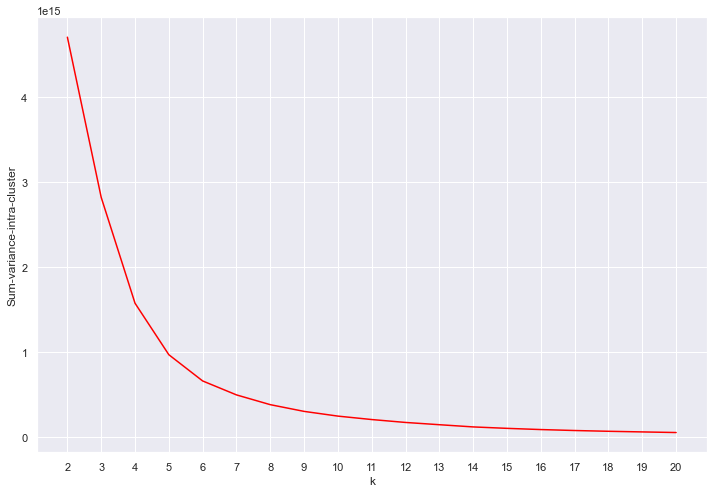

In [73]:
fig = plt.figure()

p=sns.lineplot(x=range(2,21), y=sum_variance_intra_cluster, color='red')

plt.ylabel("Sum-variance-intra-cluster")
plt.xlabel("k")

p.set_xticks( range(2,21) )

fig.savefig('p1.png', format='png', dpi=1200)

plt.show()

In [74]:
silhouette_avg = []

for j in range(2,21):

    kmeans = KMeans(n_clusters = j , random_state=123).fit(Data.values)

    cluster_labels = kmeans.labels_

    silhouette_avg.append( silhouette_score(Data.values, cluster_labels) )

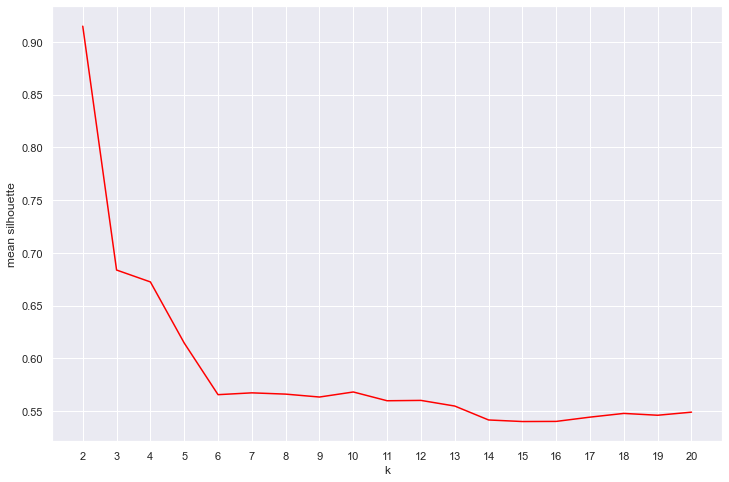

In [75]:
fig = plt.figure()

p=sns.lineplot(x=range(2,21), y=silhouette_avg , color='red')

plt.ylabel("mean silhouette")
plt.xlabel("k")

p.set_xticks( range(2,21) )

fig.savefig('p2.png', format='png', dpi=1200)

plt.show()

# k-medoids con algoritmo propio --> Ineficiente

In [ ]:
#Configuracion inicial aleatoria de los clusters:

n=len(Data)

k=4

elementos_clusterizados = []

m = resample(range(0, n), n_samples=math.floor(n/k) , replace=False, random_state=123)

Cluster_0 = Data.loc[m,:]

elementos_clusterizados.append(m)


###################################################################################


if k >= 2:

# Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
#  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.


    if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

        Cluster_1 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

        elementos_clusterizados.append(m)

    else:

        m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=123)

        Cluster_1 = Data.loc[m,:]

        elementos_clusterizados.append(m)

elif k < 2 :

    pass

###################################################################################

if k >= 3:

# Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
#  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.


    if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

        Cluster_2 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

        elementos_clusterizados.append(m)

    else:

        m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=123)

        Cluster_2 = Data.loc[m,:]

        elementos_clusterizados.append(m)

elif k < 3 :

    pass

###################################################################################

if k >= 4:

# Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
#  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.


    if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

        Cluster_3 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

        elementos_clusterizados.append(m)

    else:

        m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=123)

        Cluster_3 = Data.loc[m ,:]

        elementos_clusterizados.append(m)

elif k < 4 :

    pass

In [ ]:
lista_clusters = [None] * 4

lista_clusters[0] = Cluster_0
lista_clusters[1] = Cluster_1
lista_clusters[2] = Cluster_2
lista_clusters[3] = Cluster_3

In [ ]:
distancias_clusters_0 =  np.empty((len(lista_clusters[0]), len(lista_clusters[0])))

distancias_clusters_0[:] = 0

for i in range(0, len(lista_clusters[0])) :

    for r in  range(0, len(lista_clusters[0])) :

            distancias_clusters_0[i,r] = sum( (lista_clusters[0].iloc[i , :] - lista_clusters[0].iloc[r , :])**2 )


# Para el cluster 0 : calculamos la suma de la distancia entre x_i y el resto de observaciones, para cada i=1,..,n 

suma_distancias_cluster_0 = []

for i in range(0, distancias_clusters_0.shape[0]):

    suma_distancias_cluster_0.append( distancias_clusters_0[i,:].sum() )


medoids =[]

# np.where(suma_distancias_cluster_0 == min( suma_distancias_cluster_0 ) )[0] 
# es la fila de la matriz de distancias en la que esta la observacion x_i que minimiza 
# la suma de distancias entre x_i y el resto de observaciones del cluster 0


# lista_clusters[0].iloc[ np.where(suma_distancias_cluster_0 == min( suma_distancias_cluster_0 ) )[0] , :].index 
# es el vérdadero índice de la observacion x_i que minimiza la suma de distancias entre x_i y el resto de obs del cluster 0

medoids.append( lista_clusters[0].iloc[ np.where(suma_distancias_cluster_0 == min( suma_distancias_cluster_0 ) )[0] , :].index )


##########################################################################################

distancias_clusters_1 =  np.empty((len(lista_clusters[1]), len(lista_clusters[1])))

distancias_clusters_1[:] = 0

for i in range(0, len(lista_clusters[1])) :

    for r in  range(0, len(lista_clusters[1])) :

            distancias_clusters_1[i,r] = sum( (lista_clusters[1].iloc[i , :] - lista_clusters[1].iloc[r , :])**2 )



# Para el cluster 1 : calculamos la suma de la distancia entre x_i y el resto de observaciones, para cada i=1,..,n 

suma_distancias_cluster_1 = []

for i in range(0, distancias_clusters_1.shape[0]):

    suma_distancias_cluster_1.append( distancias_clusters_1[i,:].sum() )


medoids.append( lista_clusters[1].iloc[ np.where(suma_distancias_cluster_1 == min( suma_distancias_cluster_1 ) )[0] , :].index )

##########################################################################################

distancias_clusters_2 =  np.empty((len(lista_clusters[2]), len(lista_clusters[2])))

distancias_clusters_2[:] = 0

for i in range(0, len(lista_clusters[2])) :

    for r in  range(0, len(lista_clusters[2])) :

            distancias_clusters_2[i,r] = sum( (lista_clusters[2].iloc[i , :] - lista_clusters[2].iloc[r , :])**2 )



# Para el cluster 2 : calculamos la suma de la distancia entre x_i y el resto de observaciones, para cada i=1,..,n 

suma_distancias_cluster_2 = []

for i in range(0, distancias_clusters_2.shape[0]):

    suma_distancias_cluster_2.append( distancias_clusters_2[i,:].sum() )


medoids.append( lista_clusters[2].iloc[ np.where(suma_distancias_cluster_2 == min( suma_distancias_cluster_2 ) )[0] , :].index )

##########################################################################################

distancias_clusters_3 =  np.empty((len(lista_clusters[3]), len(lista_clusters[3])))

distancias_clusters_3[:] = 0

for i in range(0, len(lista_clusters[3])) :

    for r in  range(0, len(lista_clusters[3])) :

            distancias_clusters_3[i,r] = sum( (lista_clusters[3].iloc[i , :] - lista_clusters[3].iloc[r , :])**2 )



# Para el cluster 3 : calculamos la suma de la distancia entre x_i y el resto de observaciones, para cada i=1,..,n 

suma_distancias_cluster_3 = []

for i in range(0, distancias_clusters_3.shape[0]):

    suma_distancias_cluster_3.append( distancias_clusters_3[i,:].sum() )


medoids.append( lista_clusters[3].iloc[ np.where(suma_distancias_cluster_3 == min( suma_distancias_cluster_3 ) )[0] , :].index )


In [ ]:
medoids 

# Ha tardado 7.38 mins en calcular los medoids, tarda demasiado. 
# Si tarda esto cada vez que se tengan que actualizar los medoids, usar el codigo anterior de k-means para k-medoids no será util en la practica por el coste de computacion

# El algoritmo podria ser mas eficiente si tomase como input una matriz de distancias, se ahorrarian operaciones internas.

NameError: name 'medoids' is not defined

# k-medoids con la libreria `kmedoids`

In [3]:
from numba import njit # Para acelerar el código

In [4]:
@njit
def Dist_Euclidea(x_i, x_r):

        Dist_Euclidea = ( ( x_i - x_r )**2 ).sum()

        Dist_Euclidea = np.sqrt(Dist_Euclidea)

        return Dist_Euclidea

In [5]:
@njit
def Matrix_Dist_Euclidea(Data):

    # Paso previo necesario si Data es pd.DataFrame  --> Data = Data.to_numpy()

    n = len(Data)

    M =  np.empty((n , n))

    
    for i in range(0, n):

         for r in range(0, n):

             if i >= r :
               
                 M[i,r] = 0

             else :

                 M[i,r] = Dist_Euclidea(Data[i,:] , Data[r,:])  # Seria bueno paralelizar esta parte

                        
    # Estaria bien intentar paralelizar el bucle anterior.

    # n_jobs  = multiprocessing.cpu_count()

    # P = Parallel(n_jobs=n_jobs,  prefer="threads", verbose=0)( delayed(Dist_Euclidea)( Data[i,:] , Data[r,:])  for i in range(0,10) for r  in range(0 , 10) if i <= r )

    return M 

In [10]:
Data = Data.to_numpy()

M = Matrix_Dist_Euclidea(Data)  # Usando Numba tarda 1.6 segundos , sin el 15 segundos.

In [12]:
M # Matriz de distancias en formato triangular superior

array([[      0.        ,  150000.00727904, 1550000.00211705, ...,
         200000.01562652, 2025000.00024491, 1939113.00017324],
       [      0.        ,       0.        , 1700000.00034565, ...,
          50000.01045292, 2175000.00140668, 2089113.00126323],
       [      0.        ,       0.        ,       0.        , ...,
        1750000.00000111,  475000.01332369,  389113.01469279],
       ...,
       [      0.        ,       0.        ,       0.        , ...,
              0.        , 2225000.00274659, 2139113.00257605],
       [      0.        ,       0.        ,       0.        , ...,
              0.        ,       0.        ,   85887.00018092],
       [      0.        ,       0.        ,       0.        , ...,
              0.        ,       0.        ,       0.        ]])

In [13]:
Dist_Matrix_Euclidean = M + M.T # Obtenemos la matriz de distancias completa

Dist_Matrix_Euclidean

array([[      0.        ,  150000.00727904, 1550000.00211705, ...,
         200000.01562652, 2025000.00024491, 1939113.00017324],
       [ 150000.00727904,       0.        , 1700000.00034565, ...,
          50000.01045292, 2175000.00140668, 2089113.00126323],
       [1550000.00211705, 1700000.00034565,       0.        , ...,
        1750000.00000111,  475000.01332369,  389113.01469279],
       ...,
       [ 200000.01562652,   50000.01045292, 1750000.00000111, ...,
              0.        , 2225000.00274659, 2139113.00257605],
       [2025000.00024491, 2175000.00140668,  475000.01332369, ...,
        2225000.00274659,       0.        ,   85887.00018092],
       [1939113.00017324, 2089113.00126323,  389113.01469279, ...,
        2139113.00257605,   85887.00018092,       0.        ]])

In [190]:
import kmedoids

In [192]:
# Con la distancia Euclidea

k_medoids = kmedoids.alternating(diss=Dist_Matrix , medoids=4 , max_iter=100, init='random', random_state=123)

In [199]:
k_medoids.labels 

array([1, 1, 3, ..., 1, 3, 3], dtype=uint64)

In [197]:
k_medoids.medoids

array([ 853,  439, 1231,  871], dtype=uint64)

In [198]:
k_medoids.loss # Loss of this clustering (sum of deviations)

890132102.083845

In [206]:
Data_Clusters = pd.concat( [ Data, pd.DataFrame( {'Clusters' : k_medoids.labels} ) ], axis=1 )
Data_Clusters

,latitude,longitude,price,size_in_m_2,Clusters
0,25.113208,55.138932,2700000,100.242337,1
1,25.106809,55.151201,2850000,146.972546,1
2,25.063302,55.137728,1150000,181.253753,3
3,25.227295,55.341761,2850000,187.664060,1
4,25.114275,55.139764,1729200,47.101821,2
...,...,...,...,...,...
1900,25.176892,55.310712,1500000,100.985561,2
1901,25.166145,55.276684,1230000,70.606280,2
1902,25.206500,55.345056,2900000,179.302790,1
1903,25.073858,55.229844,675000,68.748220,3


In [208]:
Data_Clusters.loc[Data_Clusters['Clusters'] == 0 , ]

,latitude,longitude,price,size_in_m_2,Clusters
60,25.215192,55.235827,12000000,244.427793,0
125,25.195926,55.283180,10000000,315.777297,0
145,25.073590,55.126352,10560000,337.981114,0
150,25.073590,55.126352,14800000,466.187254,0
216,25.215192,55.235827,14000000,294.316704,0
235,25.200879,55.276331,10820000,263.844520,0
336,25.196489,55.272126,18614888,500.096849,0
343,25.194282,55.271884,12930000,283.261247,0
382,25.196489,55.272126,15800000,488.019459,0
426,25.188299,55.288975,16950000,455.875021,0


In [209]:
Data_Clusters.loc[Data_Clusters['Clusters'] == 1 , ]

,latitude,longitude,price,size_in_m_2,Clusters
0,25.113208,55.138932,2700000,100.242337,1
1,25.106809,55.151201,2850000,146.972546,1
3,25.227295,55.341761,2850000,187.664060,1
5,25.114275,55.139764,3119900,94.296545,1
6,25.114275,55.139764,8503600,191.565986,1
...,...,...,...,...,...
1886,25.099380,55.141275,4856888,193.981464,1
1890,25.072954,55.128089,3800000,167.875721,1
1891,25.226946,55.343628,7000000,377.929404,1
1898,25.104330,55.148769,2700000,99.963628,1


In [210]:
Data_Clusters.loc[Data_Clusters['Clusters'] == 2 , ]

,latitude,longitude,price,size_in_m_2,Clusters
4,25.114275,55.139764,1729200,47.101821,2
8,25.106668,55.149275,2100000,203.085958,2
11,25.075017,55.137997,2094999,98.291374,2
13,25.132519,55.151574,1849000,99.499113,2
14,25.132445,55.152216,2089999,97.641053,2
...,...,...,...,...,...
1892,24.865992,55.137958,1175000,301.656041,2
1893,25.073590,55.126352,2000000,79.617871,2
1895,25.081243,55.145120,1350000,146.600934,2
1900,25.176892,55.310712,1500000,100.985561,2


In [211]:
Data_Clusters.loc[Data_Clusters['Clusters'] == 3 , ]

,latitude,longitude,price,size_in_m_2,Clusters
2,25.063302,55.137728,1150000,181.253753,3
12,25.075017,55.137997,1049999,56.577927,3
19,25.180301,55.263892,950000,83.055282,3
20,25.072396,55.132386,1100000,91.509455,3
34,25.060310,55.241403,750000,73.950788,3
...,...,...,...,...,...
1894,25.191107,55.269910,980888,101.078464,3
1897,25.153080,55.254242,360000,55.741800,3
1899,25.037477,55.221942,550000,78.688841,3
1903,25.073858,55.229844,675000,68.748220,3


Repetimos lo anterior con la distancia de Gower

In [5]:
from numba import njit # Para acelerar el código

In [6]:
@njit
def a(Binary_Data) :

            X = Binary_Data

            a = X @ X.T

            return(a)

##########################################################################################
@njit
def d(Binary_Data):

            X = Binary_Data

            ones_matrix = np.ones(( X.shape[0] , X.shape[1])) 

            d = (ones_matrix - X) @ (ones_matrix - X).T

            return(d)

##########################################################################################
@njit
def alpha_py(i,j, Multiple_Categorical_Data):

                X = Multiple_Categorical_Data

                alpha = np.repeat(0, X.shape[1])

                for k in range(0, X.shape[1]) :

                    if X[i-1, k] == X[j-1, k] :

                        alpha[k] = 1

                    else :

                        alpha[k] = 0


                alpha = alpha.sum()

                return(alpha)
                


In [7]:
@njit
def Gower_Similarity_Python(i, j, X, p1, p2, p3):

   # Paso necesario si Mixed_Data_Set es un pandas data.frame -->  X = Mixed_Data_Set.to_numpy()

   # The data matrix X have to be order in the following way:
   # The p1 first are quantitative, the following p2 are binary categorical, and the following p3 are multiple categorical.

##########################################################################################
    def G(k, X):

        range = X[:,k].max() - X[:,k].min() 

        return(range)

    G_vector = np.repeat(0.5, p1)

    for r in range(0, p1):

        G_vector[r] = G(r, X)
##########################################################################################
    
    ones = np.repeat(1, p1)

    Quantitative_Data = X[: , 0:p1]

    Binary_Data = X[: , (p1):(p1+p2)]

    Multiple_Categorical_Data = X[: , (p1+p2):(p1+p2+p3) ]

##########################################################################################

    numerator_part_1 = ( ones - ( np.absolute(Quantitative_Data[i-1,:] - Quantitative_Data[j-1,:]) / G_vector ) ).sum() 

    numerator_part_2 = a(Binary_Data)[i-1,j-1] + alpha_py(i,j, Multiple_Categorical_Data)

    numerator = numerator_part_1 + numerator_part_2
 
    denominator = p1 + (p2 - d(Binary_Data)[i-1,j-1]) + p3

    Similarity_Gower = numerator / denominator  

    return(Similarity_Gower)

In [8]:
@njit
def Dist_Gower_Py(i, j, X , p1, p2, p3):

    Dist_Gower = np.sqrt( 1 - Gower_Similarity_Python(i, j, X , p1, p2, p3) )

    return(Dist_Gower)

In [9]:
@njit
def Dist_Gower_Matrix_Python(X,  p1, p2, p3):

    M = np.zeros((X.shape[0] , X.shape[0]))

    for i in range(0 , X.shape[0]):
        for j in range(0 , X.shape[0]):

            if i >= j :

                M[i,j] = 0

            else:

                M[i,j] = Dist_Gower_Py(i+1,j+1, X , p1, p2, p3)

    return M

In [10]:
Data = pd.read_csv('House_Price_Regression.csv')

Data = Data.loc[:, ['latitude', 'longitude', 'price', 'size_in_m_2', 'balcony_recode', 'quality_recode']]

Data

,latitude,longitude,price,size_in_m_2,balcony_recode,quality_recode
0,25.113208,55.138932,2700000,100.242337,1.0,2.0
1,25.106809,55.151201,2850000,146.972546,1.0,2.0
2,25.063302,55.137728,1150000,181.253753,1.0,2.0
3,25.227295,55.341761,2850000,187.664060,1.0,1.0
4,25.114275,55.139764,1729200,47.101821,0.0,2.0
...,...,...,...,...,...,...
1900,25.176892,55.310712,1500000,100.985561,1.0,3.0
1901,25.166145,55.276684,1230000,70.606280,1.0,2.0
1902,25.206500,55.345056,2900000,179.302790,1.0,2.0
1903,25.073858,55.229844,675000,68.748220,1.0,2.0


In [13]:
Data = Data.to_numpy() # necesario para aplicar la función

In [38]:
M = Dist_Gower_Matrix_Python(X=Data ,  p1=4, p2=1, p3=1)

# sin usar Numba y con 500 observaciones --> 6.10 mins
# usando Numba con 500 observaciones --> 3.22 mins
# usando Numba con todas (2000) observaciones --> tarda mas de 107 mins (lo paré antes de que se completase la ejecución)

# Hay que buscar una alternativa para poder usar Gower --> metodo ensemble

Hay que buscar una alternativa para poder usar Gower --> metodo ensemble


In [ ]:
M # Matriz de distancias en formato triangular superior

In [ ]:
Dist_Matrix_Gower = M + M.T # Obtenemos la matriz de distancias completa

Dist_Matrix_Gower

# Metodo ensemble

In [2]:
Data = pd.read_csv('House_Price_Regression.csv')

Data = Data.loc[:, ['latitude', 'longitude', 'price', 'size_in_m_2', 'balcony_recode', 'quality_recode']]

Data = Data.to_numpy() # necesario para aplicar la función

In [4]:
import kmedoids

from sklearn.utils import resample

In [38]:
df_clusters

,observacion,cluster
0,592,0
1,388,2
2,795,1
3,62,1
4,1167,3
...,...,...
19995,1023,0
19996,1158,0
19997,113,2
19998,492,3


In [57]:
def kmedoids_ensemble(k , size, B, random_seed_1, ranndom_seed_2=123, Data):

    n = len(Data)

    df_clusters = pd.DataFrame()

    sample_1 = resample(range(0, n), n_samples=n , replace=False, random_state=random_seed_1)

    for j in range(0, B):

        sample = resample(sample_1, n_samples=size , replace=False, random_state=j)

        M = Dist_Gower_Matrix_Python(X=Data[sample,:] ,  p1=4, p2=1, p3=1)

        Dist_Matrix_Gower = M + M.T # Obtenemos la matriz de distancias completa

        k_medoids = kmedoids.alternating(diss=Dist_Matrix_Gower , medoids=k , max_iter=100, init='random', random_state=ranndom_seed_2)

        df_clusters = pd.concat([df_clusters , pd.DataFrame({'observacion':sample , 'cluster':k_medoids.labels })] , ignore_index=True)

    lista_clusters_finales = []

    observaciones_usadas = df_clusters.observacion.unique() 

    observaciones_no_usadas = list(set(range(0,n)) - set( df_clusters.observacion.unique() ) )

    prop_observaciones_no_usadas = len(observaciones_no_usadas) / n

    for i in observaciones_usadas :

        a = df_clusters.loc[ df_clusters['observacion']==i , 'cluster']

        unique, counts = np.unique(a , return_counts=True)

        b = pd.DataFrame({'cluster':unique , 'counts':counts})

        c = b.sort_values(by=["counts"], ascending=False).iloc[0,:]['cluster']

        lista_clusters_finales.append(c)


    df_clusters_finales = pd.DataFrame({'observacion' : observaciones_usadas  , 'cluster_final' : lista_clusters_finales })

    return df_clusters_finales , prop_observaciones_no_usadas

In [58]:
df_clusters_finales , prop_observaciones_no_usadas = kmedoids_ensemble(k=4 , size=100, B=200, random_seed=123, Data=Data)

Observacion: antes no pudimos aplicar kmedoids.alternating() porque calclar la matriz de gower para el data-aset completo (1905 filas) tardaba mas de 106 minutos (usando herramientas de paralelizacion !). Y ahora si hemos podido, en solo 27 segundos, gracias a la estrategia ensemble.

Esto es porque el coste computacional no es lineal respecto al numero de observaciones (si se tardan 3 mins en calcular la matriz de Gower para 500 obs esto no implica que se tardara 3*4=12 mins en calcularla para 500*4 observaciones, porque de hecho se tarda mas de 106 mins). Esta es la clave de la estrategia ensemble, donde se calcula la matriz de Gower para 100 obs un numero B=200 de veces, cuyo coste computacional es muchisimo mas bajo que calcularla para 100*200 = 20000 observaciones una sola vez.

In [59]:
prop_observaciones_no_usadas

0.0

In [54]:
df_clusters_finales

,observacion,cluster_final
0,1114,1.0
1,548,0.0
2,44,2.0
3,850,0.0
4,1560,1.0
...,...,...
1900,96,1.0
1901,782,0.0
1902,890,1.0
1903,1010,0.0


In [17]:
df_clusters_finales.loc[df_clusters_finales.cluster_final == 0 , :]

,observacion,cluster_final
0,1142,0.0
2,1438,0.0
3,191,0.0
5,972,0.0
8,656,0.0
...,...,...
1745,712,0.0
1748,433,0.0
1752,125,0.0
1758,1821,0.0


In [18]:
df_clusters_finales.loc[df_clusters_finales.cluster_final == 1 , :]

,observacion,cluster_final
1,1857,1.0
7,1398,1.0
9,1420,1.0
12,746,1.0
15,1479,1.0
...,...,...
1770,892,1.0
1772,1775,1.0
1774,1797,1.0
1778,1465,1.0


In [19]:
df_clusters_finales.loc[df_clusters_finales.cluster_final == 2 , :]

,observacion,cluster_final
4,1106,2.0
6,1077,2.0
11,341,2.0
30,126,2.0
33,769,2.0
...,...,...
1763,1842,2.0
1768,652,2.0
1769,1293,2.0
1771,314,2.0


In [20]:
df_clusters_finales.loc[df_clusters_finales.cluster_final == 3 , :]

,observacion,cluster_final
21,1829,3.0
24,484,3.0
28,1083,3.0
29,1771,3.0
34,467,3.0
...,...,...
1764,78,3.0
1775,1530,3.0
1776,977,3.0
1777,791,3.0


Problema: calcular los medoids de los clusters obtenidos, puesto que conlleva un alto coste computacional

Solucion: si aumentamos B , el nº de observaciones no usadas es testimonial, esto permite saltarnos el ultimo paso de asignar estas observaciones al medoid mas cercano, lo que evita calcular los medoids y adios problema.

Con B=50 el procentaje de obs no usadas era del 6 % , con B=100 del 0.4 % con B=200 del 0 %

En un primer testeo, con B=50, calculamos los medoids para asignar ese 6 % de obs no usadas a alguno de los clusters formados. El problema es que algunos de esos clusters tenian mas de 500 observaciones, por lo que el calculo de los medoids (que involucra calcular la matriz de Gower) tardaba demasiado. Si ademas se tiene en cuenta que hay que calcular k=4 medoids, el tiempo total de computo era alto (mas de 15 minutos).

In [ ]:
medoids = []

for j in range(0 , k):

    d = df_clusters_finales.loc[df_clusters_finales.cluster_final == j , :].observacion

    M = Dist_Gower_Matrix_Python(X=Data[d,:] ,  p1=4, p2=1, p3=1)

    M2 = M + M.T

    suma_distancias = []

    for i in range(0, M2.shape[0]):

        suma_distancias.append( M2[i,:].sum() )

    h = np.where( suma_distancias == min( suma_distancias ) )

    medoids.append( Cluster_0.iloc[h[0], ].observacion )

# k-medoids de Park & Jun 

### Con definicion de los clusters iniciales alternativa a Park y Jun :

Primero lo vamos a programar con la distancia Euclidea. Si la cosa va bien puede programarse con la de Gower, aunque habrá que aplicar una estrategia ensemble para poder implementarlo en ese caso, probablemente.

In [6]:
@njit
def Dist_Euclidea(x_i, x_r):

        Dist_Euclidea = ( ( x_i - x_r )**2 ).sum()

        Dist_Euclidea = np.sqrt(Dist_Euclidea)

        return Dist_Euclidea


@njit
def Matrix_Dist_Euclidea(Data):

    # Paso previo necesario si Data es pd.DataFrame  --> Data = Data.to_numpy()

    n = len(Data)

    M =  np.empty((n , n))

    
    for i in range(0, n):

         for r in range(0, n):

             if i >= r :
               
                 M[i,r] = 0

             else :

                 M[i,r] = Dist_Euclidea(Data[i,:] , Data[r,:])  # Seria bueno paralelizar esta parte

                      
    return M 

In [63]:
def k_medoids_Park_Jun(Data, random_seed, k, max_n_iter):

###########################################################################################

# Se generan los clusters iniciales aleatoreamente

    sample = resample(range(0, len(Data)), n_samples=len(Data), replace=False, random_state=random_seed)

    df_sample = pd.DataFrame({'index': range(0,len(Data)) , 'sample':sample})

    Q = []

    for q in np.arange(0 , 1 + 1/k , 1/k):

        Q.append( np.quantile( range(0, len(Data)) , q ).round(0) )



    labels_clusters = np.array([0])

    for j in range(0,k):
   
        labels_clusters = np.concatenate([labels_clusters, np.repeat( j, len( df_sample.loc[Q[j]:(math.floor(Q[j+1])-1), 'sample'] ) ) ] ) 
 

    df_cluster = pd.DataFrame({'observacion': df_sample['sample'] , 'cluster': labels_clusters})

###########################################################################################


# calculamos los medoids de los clusters iniciales

    M1 = Matrix_Dist_Euclidea(Data)

    M2 = M1 + M1.T

   ######################

    medoids = []

    for j in range(0, k):

      a = df_cluster.loc[df_cluster.cluster == j ,].observacion

      M3 = M2[a, :][: ,a] # matriz distancias para el cluster j

      suma_distancias = M3.sum(axis=1) # suma de la matriz por filas

      h = np.where( suma_distancias == min( suma_distancias ) ) # indice en la matriz de la observacion que minimiza la suma de distancias en el cluster j --> medoid del cluster j

      d = df_cluster.loc[df_cluster.cluster == j , ]    

      # d.iloc[h[0],:].observacion indice en el data set original de la observacion medoid del cluster j   

      medoids.append( Data[ d.iloc[h[0],:].observacion , : ]  ) # su componente j es el medoid del cluster j


###########################################################################################


   # Calculamos la suma de varianzas intra cluster para los clusters iniciales

    lista_suma_varianzas_intra_cluster = []

    distancias, varianzas_intra_cluster , suma_varianzas_intra_cluster = [], [], []

    for j in range(0,k):

        for i in df_cluster.loc[df_cluster.cluster == j, 'observacion']:

            distancias.append( Dist_Euclidea(Data[i,:], medoids[j]) )

        varianzas_intra_cluster.append( sum(distancias) )


    suma_varianzas_intra_cluster.append( sum(varianzas_intra_cluster) )

    lista_suma_varianzas_intra_cluster.append( suma_varianzas_intra_cluster )


###########################################################################################


# Asignar cada observacion a su cluster más cercano (paso 3-1 del articulo Park y Jun)

# En el articulo de Park y Jun no se especifica como hacer esto.

# Se me ocurren dos opciones. Una es la expuesta en mi algoritmo de k-means (pasos 4, 5 y 6). 

# La otra opción es la que creo que está más cerca de lo que Park y Jun quieren expresar:
# 1) Se calculan las distancias entre x_i y cada uno de los medoids, y se asigna x_i al cluster cuyo medoid minimiza esas distancias.
# 2) Con ello se obtiene una nueva configuracion de clusters. Se calcula la suma de varianzas intra cluster de esa nueva configuracion.
# Si la suma de varianzas en igual a la anterior, se para. Si es menor, se repite lo anterior (pasos 1 y 2)


    n_iter = []

    iter_condicion_cluster_vacio = []


    for r in range(0 , max_n_iter):

        n_iter.append(r)
       

       # Calculamos los nuevos clusters 

        labels_clusters = []

        for i in df_sample['sample']:

            distancias = []
    
            for j in range(0,k):

                distancias.append( Dist_Euclidea(Data[i,:], medoids[j]) )

                

            df_distancias = pd.DataFrame({'Distancias' : distancias , 'Cluster': range(0,k)})

            df_distancias_sort = df_distancias.sort_values(by='Distancias', ascending=True)

            labels_clusters.append( df_distancias_sort.iloc[0]['Cluster'] )

        
        
        df_cluster = pd.DataFrame({'observacion' : df_sample['sample'] , 'cluster': labels_clusters})



        # Puede ser que se llegue a una configuracion de clusters en la que algun cluster no tiene observaciones
        # En ese caso vamos a considerar dos respuestas. O bien se deja que el algoritmo haga una seleccion de k. 
        # O bien se fuerza a que k sea el fijado, aignando una observacion aleatoriamente a ese cluster vacio.
        # Vamos a implementar la segunda.

        #for j in range(0,k):

            #if len(df_cluster.loc[df_cluster.cluster == j ,]) == 0 :

                #iter_condicion_cluster_vacio.append(r)

                # Si un cluster esta vacio (no se le ha asignado ningun elemento), se le asigna una observacion al azar
                # Y se elimina esa observacion del cluster al que pertenecia.

                #m = resample(range(0, len(Data)), n_samples=1 , replace=False)

                # Eliminamos la observacion m del cluster al que se le habia asignado 

                #df_cluster = df_cluster.drop(df_cluster.loc[df_cluster.observacion == m[0] , :].index)

                # Asignamos la observacion m al cluster vacio

                #df_cluster = pd.concat([df_cluster , pd.Series({'observacion': df_sample.loc[m[0] , 'sample'], 'cluster': j }).to_frame().T ], ignore_index=True)
                



###########################################################################################


       # Calculamos los medoids de los nuevos clusters

        medoids = []
        label_medoids =[]


        for j in range(0, k):                    
                
                a = df_cluster.loc[df_cluster.cluster == j ,].observacion

                M3 = M2[a, :][: ,a] # matriz distancias para el cluster j

                suma_distancias = M3.sum(axis=1) # suma de la matriz por filas

                h = np.where( suma_distancias == min( suma_distancias) ) # indice en la matriz de la observacion que minimiza la suma de distancias en el cluster j --> medoid del cluster j

                d = df_cluster.loc[df_cluster.cluster == j , ]    

                # d.iloc[h[0],:].observacion indice en el data set original de la observacion medoid del cluster j   

                medoids.append( Data[ d.iloc[h[0],:].observacion , : ]  ) # su componente j es el medoid del cluster j
  
                label_medoids.append(d.iloc[h[0],:].observacion)



###########################################################################################

        # Calculamos la suma de varianzas intra cluster para los nuevos clusters

        distancias, varianzas_intra_cluster , suma_varianzas_intra_cluster = [], [], []

        for j in range(0,k):

            for i in df_cluster.loc[df_cluster.cluster == j, 'observacion']:

                distancias.append( Dist_Euclidea(Data[i,:], medoids[j]) )

            varianzas_intra_cluster.append( sum(distancias) )


        suma_varianzas_intra_cluster.append( sum(varianzas_intra_cluster) )

        lista_suma_varianzas_intra_cluster.append( suma_varianzas_intra_cluster )


        #####################

        # if lista_suma_varianzas_intra_cluster[r+1] != lista_suma_varianzas_intra_cluster[r] :

            # continue

        # else :

            # break


        ###########################################

    df_cluster_final = pd.DataFrame({'observaciones': df_sample['sample']  , 'cluster': labels_clusters })



    return df_cluster_final, df_cluster, lista_suma_varianzas_intra_cluster, n_iter, iter_condicion_cluster_vacio, label_medoids, medoids


In [ ]:
Data.to_numpy()  # necesario para usar la función

In [10]:
import math

In [64]:
df_cluster_final, df_cluster, lista_suma_varianzas_intra_cluster, n_iter, iter_condicion_cluster_vacio, label_medoids, medoids = k_medoids_Park_Jun(Data=Data, random_seed=123, k=4, max_n_iter=100)

In [56]:
df_cluster_final

,observaciones,cluster
0,382,3.0
1,732,1.0
2,1888,1.0
3,679,0.0
4,1004,2.0
...,...,...
1900,1122,0.0
1901,1346,1.0
1902,1406,0.0
1903,1389,1.0


In [43]:
from itertools import chain

In [68]:
# unlist a list:

lista_suma_varianzas_intra_cluster = list(chain.from_iterable(lista_suma_varianzas_intra_cluster))

In [55]:
len(lista_suma_varianzas_intra_cluster)

28

In [65]:
len(n_iter)

50

In [70]:
df_suma_varianzas_intra_cluster = pd.DataFrame({'sumas':lista_suma_varianzas_intra_cluster  , 'iter': range(0, 51)})

In [50]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='iter', ylabel='sumas'>

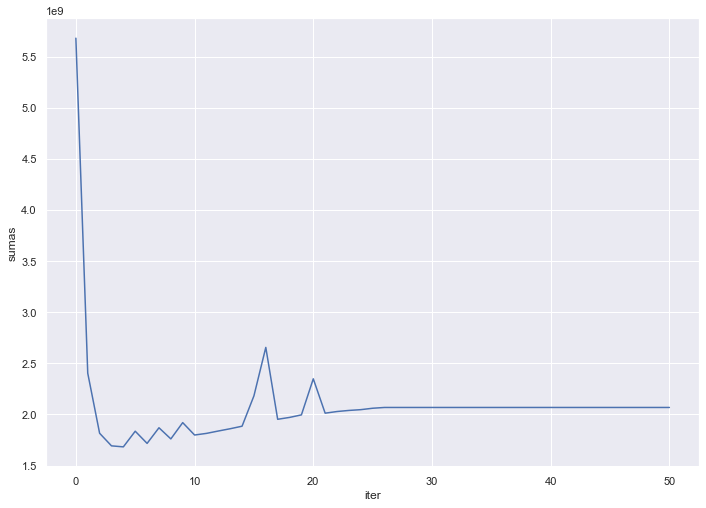

In [71]:
sns.lineplot(data=df_suma_varianzas_intra_cluster, y='sumas', x='iter')

La suma de varianzas intra cluster no decrece con cada nueva configuracion de clusters. Por que??


Se me ocurre que podriamos quedarnos con la configuracion de cluster de aquella iteracion con la que se obtiene menor suma de varianzas intra cluster.


Otro problema del algoritmo es que te genera clusters vacios. Por que ocurre esto ??

Yo he respondido a esta problematica asignando observaciones aleatoriamente a esos clusters. Pero seguro que pueden hacerse otras cosas mejores. 

In [61]:
df_suma_varianzas_intra_cluster.sort_values(by='sumas', ascending=True)

,sumas,iter
4,1.683331e+09,4
3,1.693215e+09,3
6,1.717295e+09,6
8,1.761202e+09,8
10,1.799109e+09,10
11,1.815101e+09,11
2,1.816267e+09,2
5,1.836396e+09,5
12,1.838311e+09,12
13,1.860593e+09,13


Otra forma de definir los clusters iniciales. Pero es peor que la primera por los siguientes motivos:

1. Solo permite usar k=1,2,3,4 
2. Mas costosa computacionalmente.

In [ ]:
def init_clusters_2(Data, k):

#Configuracion inicial aleatoria de los clusters:

    n=len(Data)

    elementos_clusterizados = []

    m = resample(range(0, n), n_samples=math.floor(n/k) , replace=False, random_state=123)

    Cluster_0 = Data.loc[m,:]

    elementos_clusterizados.append(m)


###################################################################################


    if k >= 2:

# Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
#  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.


        if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

            Cluster_1 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

            elementos_clusterizados.append(m)

        else:

            m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=123)

            Cluster_1 = Data.loc[m,:]

            elementos_clusterizados.append(m)

    elif k < 2 :

        pass

###################################################################################

    if k >= 3:

# Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
#  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.


        if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

            Cluster_2 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

            elementos_clusterizados.append(m)

        else:

            m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=123)

            Cluster_2 = Data.loc[m,:]

            elementos_clusterizados.append(m)

    elif k < 3 :

        pass

###################################################################################

    if k >= 4:

# Si los elementos que quedan por clusterizar menos el tamaño de los clusters es menor que el propio tamaño de los clusters,
#  se meten todos los elementos que quedan por clusterizar en un mimsmo cluster que será ademas el ultimo.


        if len(np.delete(range(0,n), elementos_clusterizados)) - n/k  < n/k : 

            Cluster_3 = Data.loc[np.delete(range(0,n), elementos_clusterizados),:]

            elementos_clusterizados.append(m)

        else:

            m = resample(np.delete(range(0,n), elementos_clusterizados), n_samples=math.floor(n/k) , replace=False, random_state=123)

            Cluster_3 = Data.loc[m ,:]

            elementos_clusterizados.append(m)

    elif k < 4 :

        pass

## Con definicion de los clusters iniciales igual a Park y Jun :

In [22]:
random_seed = 123
k=4

# Se generan los clusters iniciales aleatoreamente

sample = resample(range(0, len(Data)), n_samples=len(Data), replace=False, random_state=random_seed)

df_sample = pd.DataFrame({'index': range(0,len(Data)) , 'sample':sample})

Q = []

for q in np.arange(0 , 1 + 1/k , 1/k):

        Q.append( np.quantile( range(0, len(Data)) , q ).round(0) )



labels_clusters = np.array([0])

for j in range(0,k):
   
        labels_clusters = np.concatenate([labels_clusters, np.repeat( j, len( df_sample.loc[Q[j]:(math.floor(Q[j+1])-1), 'sample'] ) ) ] ) 
 

df_cluster = pd.DataFrame({'observacion': df_sample['sample'] , 'cluster': labels_clusters})

###########################################################################################


# calculamos los medoids de los clusters iniciales

M1 = Matrix_Dist_Euclidea(Data)

M2 = M1 + M1.T

   ######################

medoids = []

for j in range(0, k):

      a = df_cluster.loc[df_cluster.cluster == j ,].observacion

      M3 = M2[a, :][: ,a] # matriz distancias para el cluster j

      suma_distancias = M3.sum(axis=1) # suma de la matriz por filas

      h = np.where( suma_distancias == min( suma_distancias ) ) # indice en la matriz de la observacion que minimiza la suma de distancias en el cluster j --> medoid del cluster j     

      d = df_cluster.loc[df_cluster.cluster == j , ]    

      # d.iloc[h[0],:].observacion indice en el data set original de la observacion medoid del cluster j   

      medoids.append( Data[ d.iloc[h[0],:].observacion , : ]  ) # su componente j es el medoid del cluster j

      # Data[df_cluster.iloc[h[0], :].observacion , :] es el medoid del cluster j



KeyError: "None of [Int64Index([197], dtype='int64')] are in the [index]"

In [26]:
h

(array([197], dtype=int64),)

In [31]:
df_cluster.loc[df_cluster.cluster == j ,]

,observacion,cluster
477,1189,1
478,65,1
479,805,1
480,1832,1
481,841,1
...,...,...
948,195,1
949,482,1
950,1060,1
951,568,1


In [33]:
d = df_cluster.loc[df_cluster.cluster == j ,]

d.iloc[h[0],:].observacion

674    1351
Name: observacion, dtype: int64

In [29]:
df_cluster

,observacion,cluster
0,382,0
1,732,0
2,1888,0
3,679,0
4,1004,0
...,...,...
1900,1122,3
1901,1346,3
1902,1406,3
1903,1389,3
